In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from pandas import Series, DataFrame
%matplotlib inline 

In [3]:
titanic_df = pd.read_csv('F:\\Libraries\\Documents\\Phyton project\\udemy\\train.csv')

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


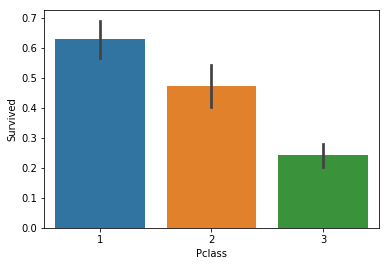

In [40]:
sbs.barplot('Pclass','Survived', data=titanic_df)

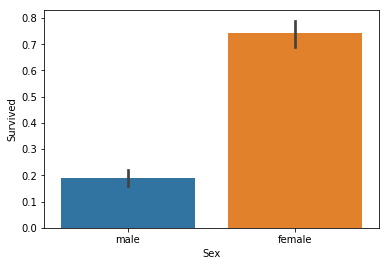

In [47]:
sbs.barplot('Sex','Survived', data=titanic_df)
#sbs.barplot('Sex', data=titanic_df)

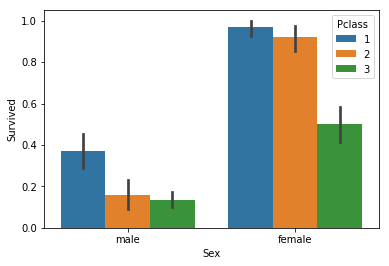

In [27]:
sbs.barplot('Sex','Survived', data=titanic_df, hue = 'Pclass')

In [11]:
#np.array('Sex")
unique, counts = np.unique(np.array(titanic_df["Sex"]), return_counts=True)
sex_tbl=dict(zip(unique, counts))
sex_tbl

{'female': 314, 'male': 577}

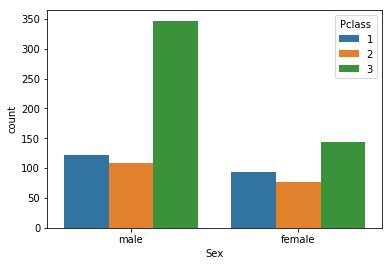

In [30]:
sbs.countplot('Sex',data=titanic_df, hue = 'Pclass')

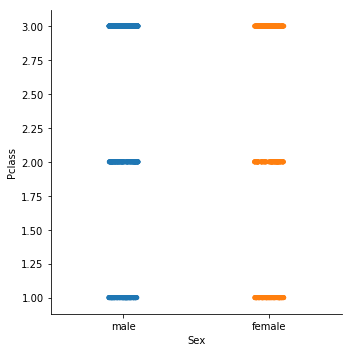

In [16]:
#sbs.catplot("Sex",  'Pclass', data=titanic_df)

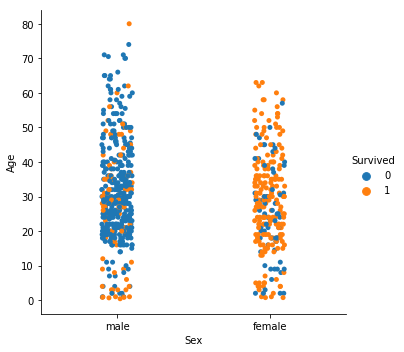

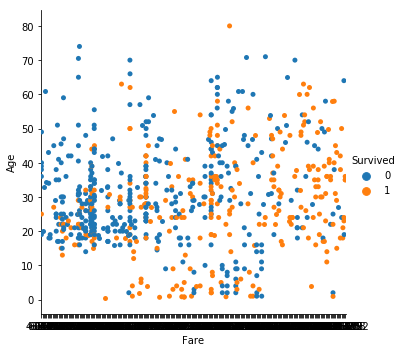

In [25]:
sbs.catplot("Sex",'Age', hue = 'Survived', data=titanic_df)
sbs.catplot("Fare",'Age', hue = 'Survived', data=titanic_df)

In [22]:
#titanic_df.set_index("Sex").count("Sex")

In [23]:
#titanic_df.count("Sex")
#a=np.array("Sex")

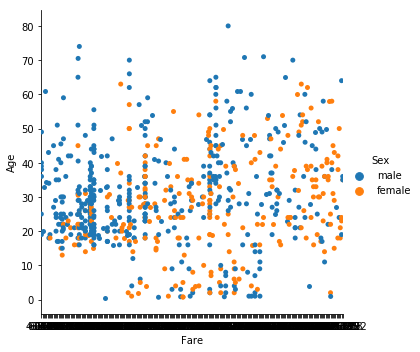

In [26]:
sbs.catplot("Fare",'Age', hue = 'Sex', data=titanic_df)